In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('Computer-Vision-with-Python/DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('Computer-Vision-with-Python/DATA/solvay_conference.jpg',0)

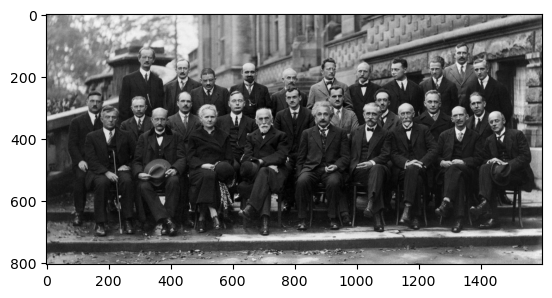

In [3]:
plt.imshow(solvay,cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [6]:
result = detect_face(denis)

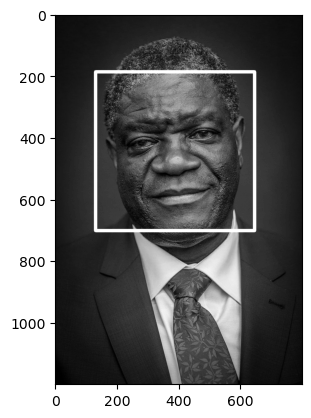

In [7]:
plt.imshow(result,cmap='gray')

In [8]:
result = detect_face(nadia)

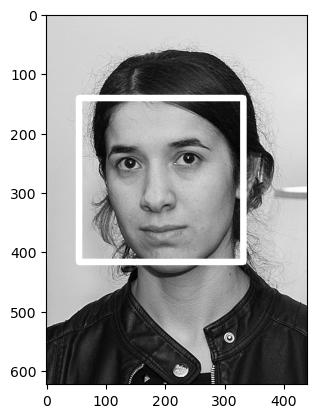

In [9]:
plt.imshow(result,cmap='gray')

In [10]:
result = detect_face(solvay)

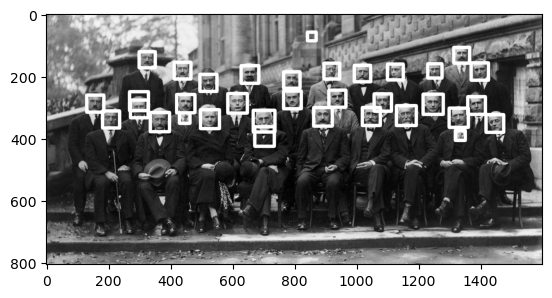

In [11]:
plt.imshow(result,cmap='gray')

In [12]:
def adj_detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [13]:
result = adj_detect_face(solvay)

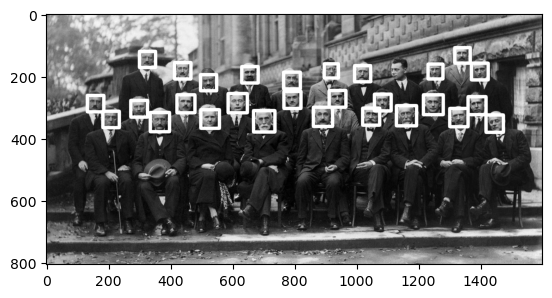

In [14]:
plt.imshow(result,cmap='gray')

In [15]:
## Eye Detection
eye_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [16]:
def detect_eye(img):
    eye_img = img.copy()

    eye_rects = eye_cascade.detectMultiScale(eye_img)

    for (x,y,w,h) in eye_rects:
        cv2.rectangle(eye_img, (x,y),(x+w,y+h),(255,255,255),10)
    
    return eye_img

In [17]:
result = detect_eye(nadia)

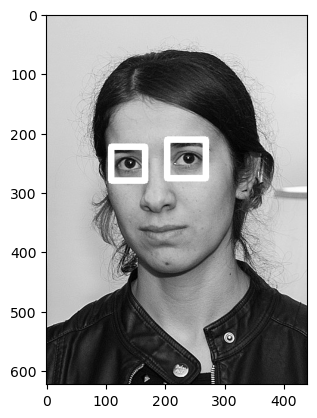

In [18]:
plt.imshow(result,cmap='gray')

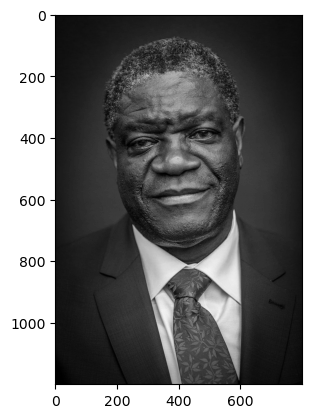

In [19]:
result = detect_eye(denis)
plt.imshow(result,cmap='gray')

In [20]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    
    frame = adj_detect_face(frame)

    cv2.imshow('Video Face Detect',frame)

    k = cv2.waitKey(1)
    if k == 27: # Esc key
        break
cap.release()
cv2.destroyAllWindows()

## Assessment 

In [21]:
img = cv2.imread('Computer-Vision-with-Python/DATA/car_plate.jpg')

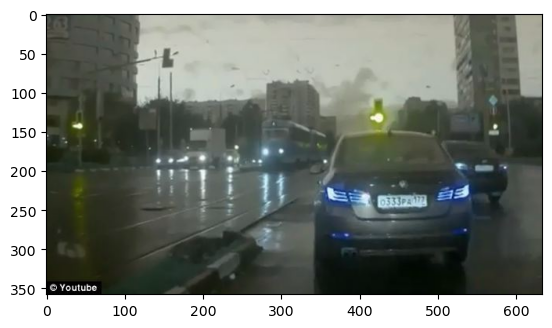

In [22]:
plt.imshow(img,cmap='gray')

In [23]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

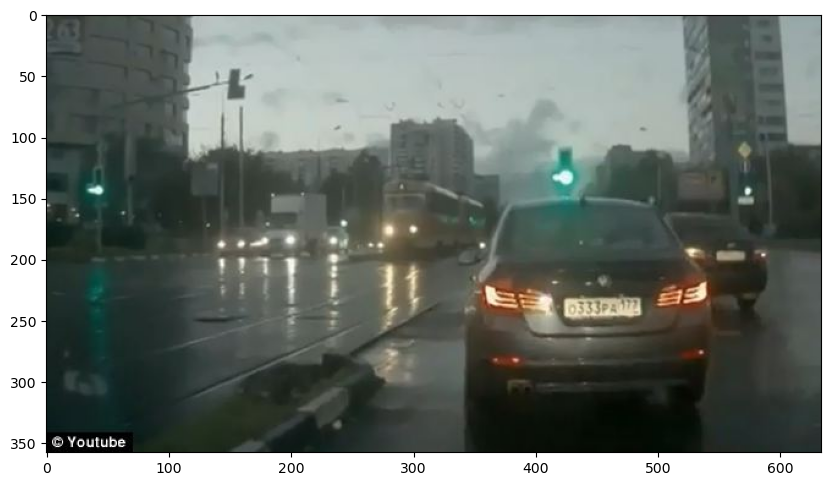

In [24]:
display(img)

In [25]:
## Plate Detection
plate_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [26]:
def detect_plate(img):
    plate_img = img.copy()

    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y),(x+w,y+h),(0,0,255),5)
    
    return plate_img

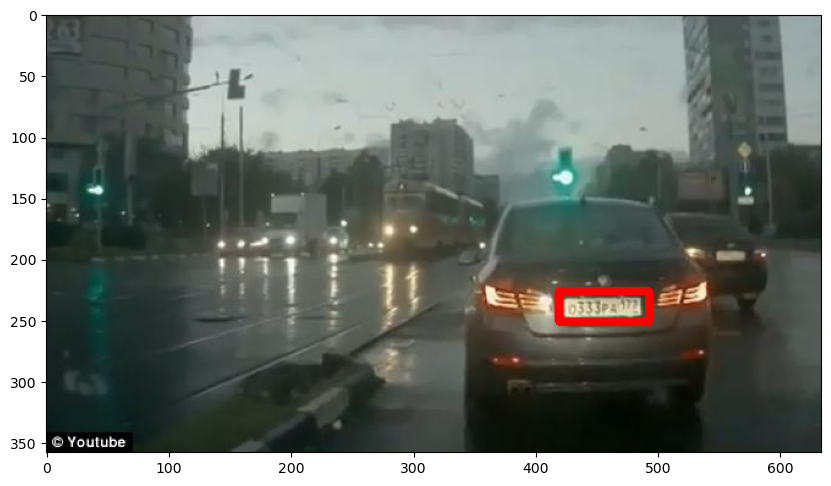

In [27]:
result = detect_plate(img)
display(result)

In [28]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w] = blurred_roi
    
    return plate_img

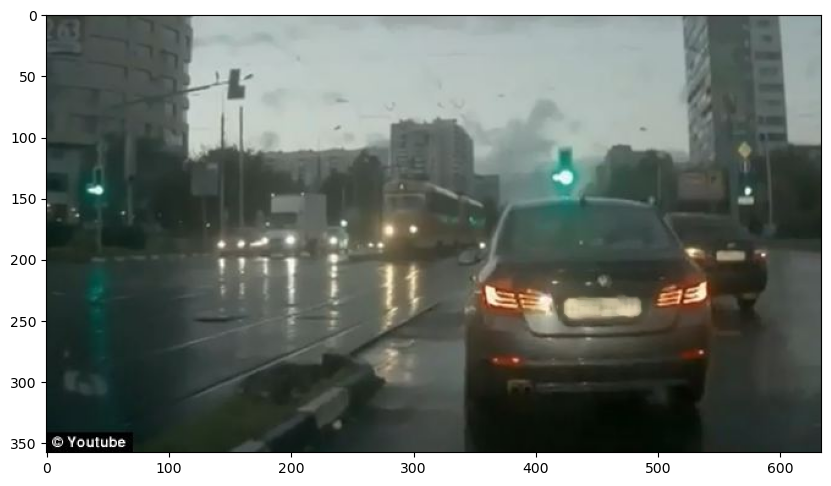

In [29]:
result = detect_and_blur_plate(img)
display(result)

In [30]:
def detect_and_blur_face(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = face_cascade.detectMultiScale(plate_img,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w] = blurred_roi
    
    return plate_img

In [31]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    
    frame = detect_and_blur_face(frame)

    cv2.imshow('Video Face Detect',frame)

    k = cv2.waitKey(1)
    if k == 27: # Esc key
        break
cap.release()
cv2.destroyAllWindows()

In [74]:
smile_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

In [75]:
def detect_smile(img):
    smile_img = img.copy()

    smile_rects = smile_cascade.detectMultiScale(smile_img)#,scaleFactor=1.2,minNeighbors=5)

    for (x,y,w,h) in smile_rects:
        cv2.rectangle(smile_img, (x,y),(x+w,y+h),(255,255,255),10)
    
    return smile_img

In [76]:
# cap = cv2.VideoCapture(0)

# while True:
#     ret,frame = cap.read(0)
    
#     frame = detect_smile(frame)

#     cv2.imshow('Video Face Detect',frame)

#     k = cv2.waitKey(1)
#     if k == 27: # Esc key
#         break
# cap.release()
# cv2.destroyAllWindows()

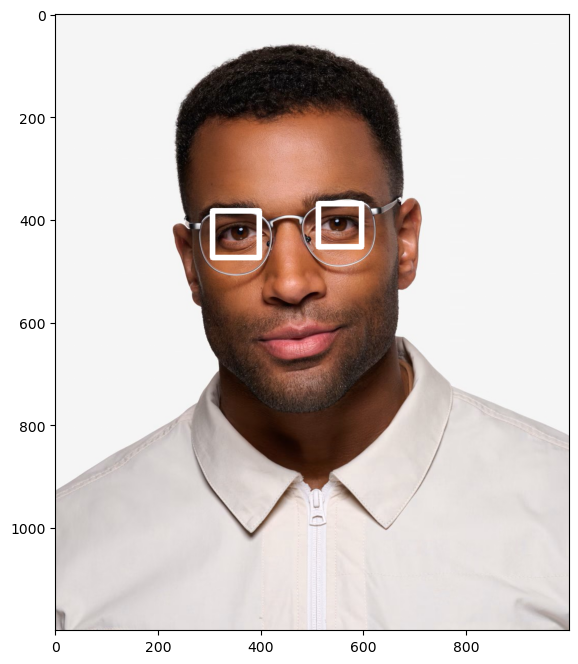

In [80]:
img = cv2.imread(r"C:\Users\okeiy\Downloads\2.jpg")
result = detect_smile(img)
display(result)

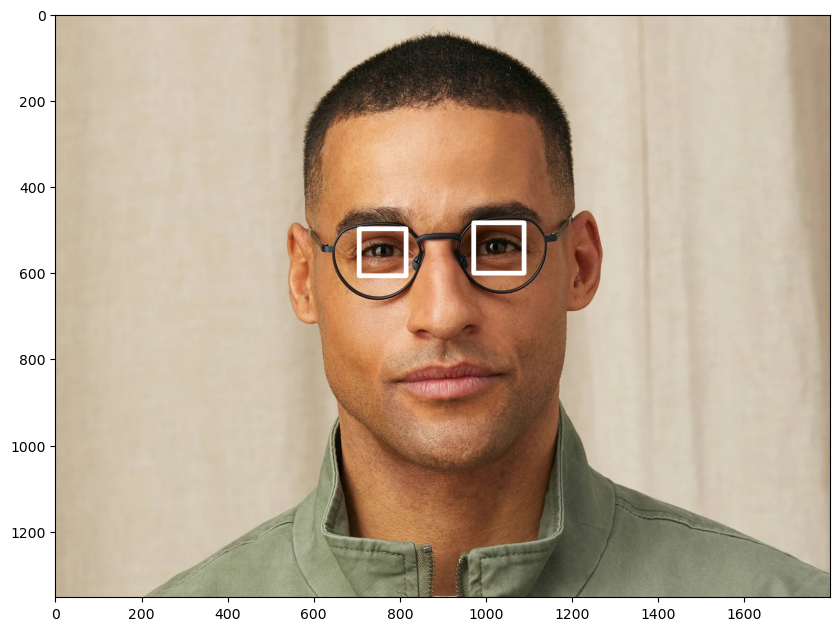

In [81]:
img = cv2.imread(r"C:\Users\okeiy\Downloads\1.jpg")
result = detect_smile(img)
display(result)